In [1]:
import networkx as nx
import pylab as plt
import numpy as np

# It's intended to disable warning messages that appear when drawing a graph.
import warnings
warnings.filterwarnings('ignore')

plt.ion()

## Defining a graph

In [2]:
g = nx.Graph()

g.add_edge('a', 'b', weight=0.1)
g.add_edge('b', 'c', weight=1.5)
g.add_edge('a', 'c', weight=1.0)
g.add_edge('c', 'd', weight=2.2)

## Some basic properties of the graph

In [3]:
g.number_of_nodes()

4

In [4]:
g.order()

4

In [5]:
g.nodes()

['a', 'b', 'c', 'd']

In [6]:
g.edges()

[('a', 'b'), ('a', 'c'), ('b', 'c'), ('c', 'd')]

In [7]:
g.edges('b')

[('b', 'a'), ('b', 'c')]

In [8]:
g.degree('a')

2

In [9]:
g.neighbors('c')

['b', 'a', 'd']

In [10]:
nx.shortest_path(g, 'b', 'd')

['b', 'c', 'd']

In [11]:
nx.shortest_path(g, 'b', 'd', weight='weight')

['b', 'a', 'c', 'd']

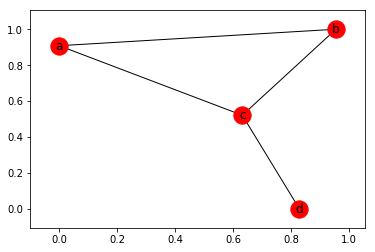

In [12]:
nx.draw_networkx(g)

## Multigraph: multiple edges

In [13]:
mg = nx.MultiGraph()
mg.add_weighted_edges_from([(1, 2, 0.5), (1, 2, 0.75), (2, 3, 0.5)])

In [14]:
mg.degree()

{1: 2, 2: 3, 3: 1}

In [15]:
mg.degree(weight='weight')

{1: 1.25, 2: 1.75, 3: 0.5}

## Digraph directed graphs

In [16]:
dg = nx.DiGraph()
dg.add_weighted_edges_from([(1, 4, 0.5), (3, 1, 0.75)])

In [17]:
dg.degree(1, weight='weight')

1.25

In [18]:
dg.successors(1)

[4]

In [19]:
dg.predecessors(1)

[3]

## More graphs generators

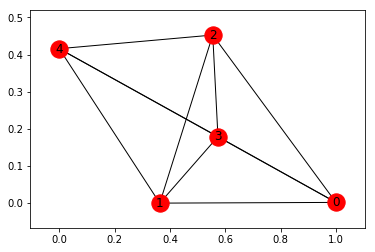

In [20]:
K_5 = nx.complete_graph(5)
nx.draw_networkx(K_5)

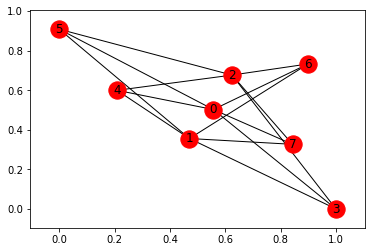

In [21]:
K_3_5 = nx.complete_bipartite_graph(3, 5)
nx.draw_networkx(K_3_5)

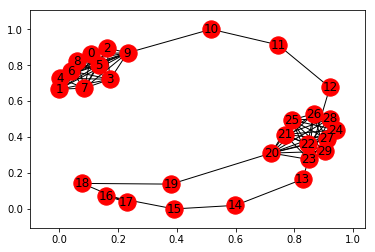

In [22]:
barbell = nx.barbell_graph(10, 10)
nx.draw_networkx(barbell)

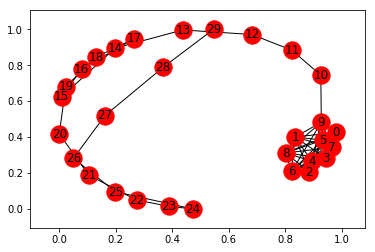

In [23]:
lollipop = nx.lollipop_graph(10, 20)
nx.draw_networkx(lollipop)

## Random graphs generators

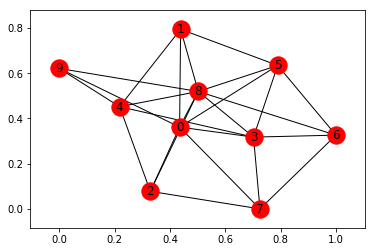

In [24]:
er = nx.erdos_renyi_graph(10, 0.5)
nx.draw_networkx(er)

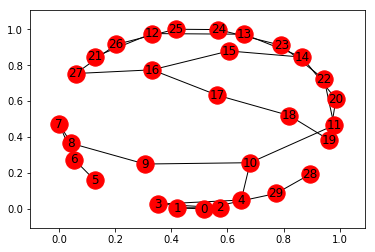

In [25]:
ws = nx.watts_strogatz_graph(30, 3, 0.1)
nx.draw_networkx(ws)

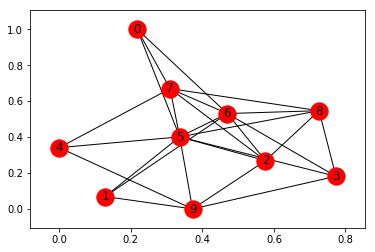

In [26]:
ba = nx.barabasi_albert_graph(10, 5)
nx.draw_networkx(ba)

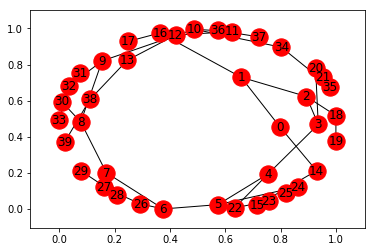

In [27]:
red = nx.random_lobster(25, 0.9, 0.9)
nx.draw_networkx(red)

## Visualization

In [28]:
g = nx.erdos_renyi_graph(100, 0.15)

#### Before disabling, the warning messages appeared in these draw commands. 

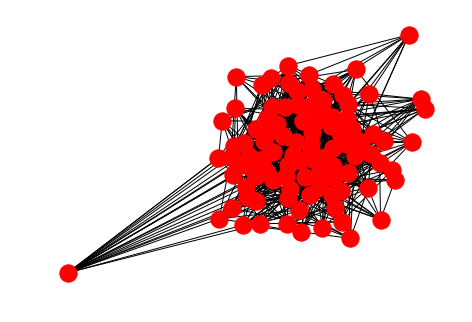

In [29]:
nx.draw(g)

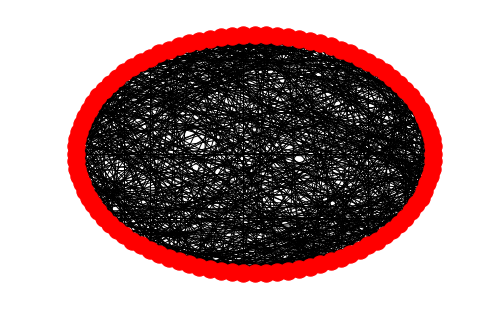

In [30]:
nx.draw_circular(g)

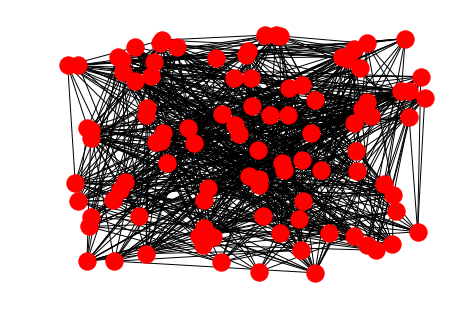

In [31]:
nx.draw_random(g)

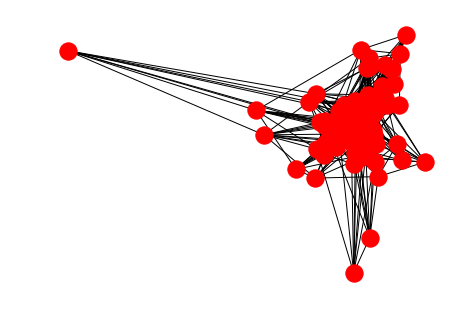

In [32]:
nx.draw_spectral(g)

## Graph properties

In [33]:
N, K = g.order(), g.size()
avg_deg = K/N
print ("\nNodes: ", N)
print ("Edges: ", K)
print ("Average degree: ", avg_deg)


Nodes:  100
Edges:  757
Average degree:  7.57


## Degree distribution

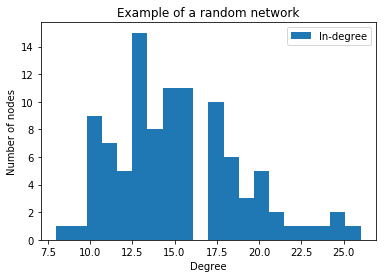

In [34]:
# Create a directed graph.
diG = nx.DiGraph(g) 

# Account for in/out-going connections.
in_degrees = diG.in_degree()   # dictionary node: degree.
out_degrees = diG.out_degree() # dictionary node: degree.

# Plot in degree distribution.
plt.hist(list(in_degrees.values()), bins=20, histtype='stepfilled');
plt.legend(['In-degree']);
plt.xlabel('Degree');
plt.ylabel('Number of nodes');
plt.title('Example of a random network');

## Clustering coefficient

In [35]:
g_ud = diG.to_undirected()

# Clustering coefficient of node 0.
print(nx.clustering(g_ud, 0))

0.14285714285714285


In [36]:
# Clustering coefficient of all nodes (in a dictionary).
clust_coefficients = nx.clustering(g_ud)

# Average clustering coefficient.
ccs = clust_coefficients
avg_clust = sum(ccs.values()) / len(ccs)
print(avg_clust)

0.1537376815172682


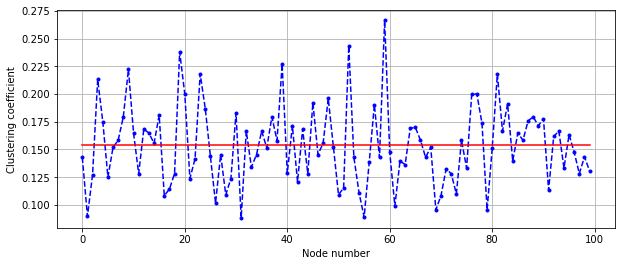

In [37]:
plt.figure(figsize=(10, 4))
plt.plot(list(ccs.keys()), list(ccs.values()), '--b.');
plt.grid(True)
plt.hold(True)
plt.plot(list(ccs.keys()), avg_clust*np.ones(len(ccs)), '-r')
plt.xlabel("Node number");
plt.ylabel("Clustering coefficient");

## Modeling Twitter relationships I - Following

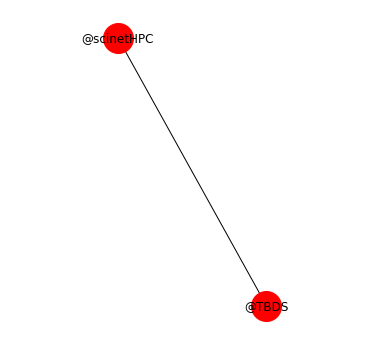

In [38]:
g = nx.Graph()
g.add_node(0, {"handle": "@scinetHPC"})
g.add_node(1, {"handle": "@TBDS"})
g.add_edge(0, 1)

node_labels = nx.get_node_attributes(g, 'handle')

plt.figure(figsize=(4.5, 4.5))
plt.ion()

pos = nx.spring_layout(g)
nx.draw(g, pos, arrows=True, node_size=900)
nx.draw_networkx_labels(g, pos, labels=node_labels);

## Modeling Twitter relationships II - Re-Tweets

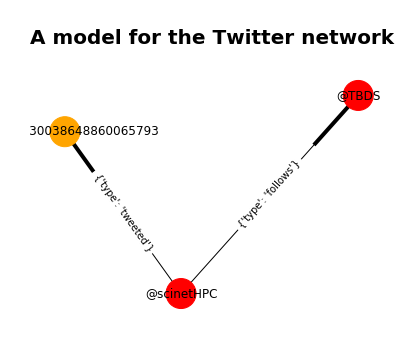

In [39]:
g = nx.DiGraph()
g.add_node(0, {"id": "@scinetHPC", "color": "r"})
g.add_node(1, {"id": "@TBDS", "color": "r"})
g.add_node(2, {"id": "Tweet #530038648860065793", "color": "orange"})
g.add_edge(0, 1, {"type": "follows"})
g.add_edge(0, 2, {"type": "tweeted"})

node_labels = nx.get_node_attributes(g, 'id')
edge_labels = nx.get_edge_attributes(g, 'type')
colors = nx.get_node_attributes(g, 'color')

plt.figure(figsize=(6.5 ,4.5))
plt.title("\nA model for the Twitter network\n", 
          {'fontsize': 20, 'fontweight': 'bold'});


pos = nx.spring_layout(g)
nx.draw(g, pos, arrows=True, node_size=900, node_color=list(colors.values()))
nx.draw_networkx_labels(g, pos, labels=node_labels);
nx.draw_networkx_edge_labels(g, pos, labels=edge_labels);